In [1]:
from collections import namedtuple
import pandas as pd
import matplotlib
import numpy as np
import numpy.linalg as LA
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import Utils.BuildMatrix as bm
import Utils.TaggedRowVecs as trv
import Utils.TrvPlot as trvPlt
np.core.arrayprint._line_width = 160
%matplotlib inline

#### Constants used in all examples

In [2]:
x_steps = 3
y_steps = 4
z_steps = 5
dim = 20

#### Gaussians

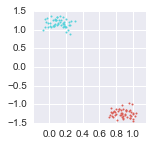

In [3]:
q = trv.Gaussians(dim=dim)
tcvG = trv.Gaussians(centers=q,
                     num_points=50,
                     covMatrix=np.matrix(np.diag([.01] * dim)))
resG = trvPlt.PlotTrvs(tcvG,
                       figsize=(2,2), 
                       markersize=2, 
                       tag_extractor=lambda x: x[0])

#### 2d Lattice

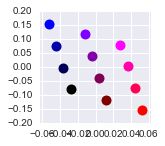

In [4]:
l2 = trv.d2Lattice(
    centers=trv.Single(vec=np.array([0.] * dim), tag='.'),
    span1=np.array([0, 1] + [0] *(dim - 2)),
    span2=np.array([1] + [0] *(dim - 1)),
    steps1=x_steps, 
    steps2=y_steps
)
resl2 = trvPlt.PlotTrvsGrid(l2, figsize=(2,2), 
                            span_x=x_steps, 
                            span_y=y_steps,
                            proj_matrix=bm.randOrthoNormalMatrix(dim),
                            tag_extractor=lambda x: x[1])

#### 3d Lattice, with plot projection

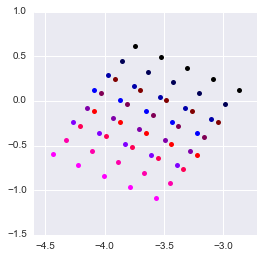

In [5]:
l3 = trv.d3Lattice(steps1=x_steps, steps2=y_steps, steps3=z_steps)
resl3 = trvPlt.PlotTrvsGrid(l3, 
                            figsize=(4,4), 
                            span_x=x_steps, 
                            span_y=y_steps,
                            markersize=5,
                            proj_matrix=bm.randOrthoNormalMatrix(3),
                            tag_extractor=lambda x: x[1])

#### Twin Gaussians: two gaussians with the same center

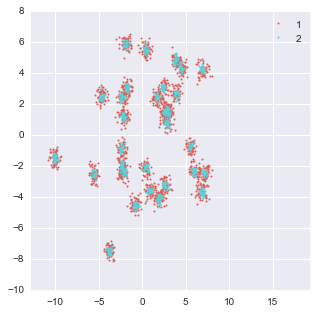

In [6]:
q = trv.Gaussians(
    centers=trv.Single(vec=np.array([0] * dim), tag='.'),
    covMatrix=np.matrix(np.diag([15.] * dim)),
    num_points=30)
tcvG = trv.GaussianTwins(
    centers=q,
    covMatrix1=np.matrix(np.diag([.1] * dim)),
    covMatrix2=np.matrix(np.diag([0.025] * dim)),
    num_points1=60, 
    num_points2=30)
resG = trvPlt.PlotTrvs(
                tcvG, 
                figsize=(5,5), 
                markersize=2,
                proj_matrix=bm.randOrthoNormalMatrix(dim),
                tag_extractor=lambda x: x[0],
                showLegend=True)

#### Nested lattices

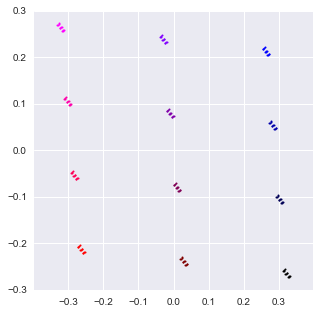

In [7]:
l2 = trv.d2Lattice(
    centers=trv.Single(vec=np.array([0.] * dim), tag='.'),
    span1=np.array([0, 1] + [0] *(dim - 2)),
    span2=np.array([1] + [0] *(dim - 1)),
    steps1=x_steps, 
    steps2=y_steps
)

l2l2 = trv.d2Lattice(
    centers=l2,
    span1=np.array([0, 0, 0, .1] + [0] *(dim - 4)),
    span2=np.array([0, 0, .05] + [0] *(dim - 3)),
    steps1=x_steps, 
    steps2=y_steps
)

resl2l2 = trvPlt.PlotTrvsGrid(
                    l2l2, 
                    figsize=(5,5),
                    markersize=2,
                    span_x=x_steps, 
                    span_y=y_steps,
                    proj_matrix=bm.randOrthoNormalMatrix(dim),
                    tag_extractor=lambda x: x[1])

#### Lattice of Gauss Twins

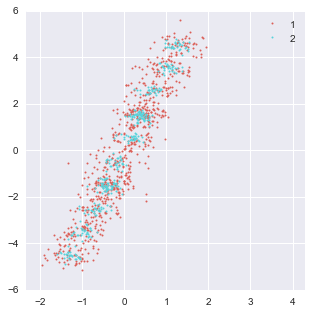

In [8]:
l2a = trv.d2Lattice(
    centers=trv.Single(vec=np.array([0.] * dim), tag='.'),
    span1=np.array([0, 100.] + [0] *(dim - 2)),
    span2=np.array([100.] + [0] *(dim - 1)),
    steps1=x_steps, 
    steps2=y_steps
)

tcvGa = trv.GaussianTwins(
    centers=l2a,
    covMatrix1=np.matrix(np.diag([.1] * dim)),
    covMatrix2=np.matrix(np.diag([0.025] * dim)),
    num_points1=60, 
    num_points2=30)
resG = trvPlt.PlotTrvs(
                tcvGa, 
                figsize=(5,5), 
                markersize=2,
                proj_matrix=bm.randOrthoNormalMatrix(dim),
                tag_extractor=lambda x: x[0],
                showLegend=True)

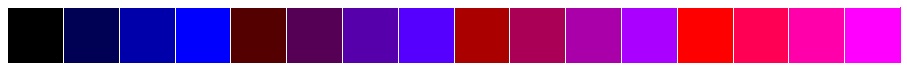

In [9]:
sp = 4
cr = trvPlt.MakeRedBlueGridColorer(span_x=sp, span_y=sp)
clrs = [cr((x, y)) for x in range(sp) for y in range(sp)]
sns.palplot(clrs)